In [1]:
import numpy as np
np.random.seed(114514)

import matplotlib.pyplot as plt

import sys 
sys.path.append("..") 
from data import get_database_path, get_h5_files, read_h5_file
from visualize import plot_event_cloud, plot_hists


In [5]:
def rotate(events):
    events[:,:,2] = (events[:,:,2] - events[:,0,2].reshape(len(events), 1)) % np.pi 
    return events

In [11]:
Delphes = np.load('datasets_-1.npz')
unpreprocessed_labels = ['x_train','x_test', 'x_val']
full_SM_dataset = np.concatenate([Delphes[label] for label in unpreprocessed_labels], axis=0)
full_SM_dataset = full_SM_dataset.reshape(full_SM_dataset.shape[:3])
print(full_SM_dataset.shape)

(14451914, 19, 3)


In [12]:
print(full_SM_dataset[0])

[[13.65091991  0.         -1.61326444]
 [28.93702888  0.81659317 -1.67997897]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [45.79579163  0.89488125 -1.72020626]
 [44.72616959  2.7366116   1.03738618]
 [36.32344055 -0.62255085  2.19731951]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


In [13]:
full_SM_dataset = rotate(full_SM_dataset)

In [14]:
from data import sample_pairs_with_emd, sample_pairs_with_emd_multi,store_emds_with_pairs
from utils import load_toml_config
EMD_config = load_toml_config('EMD')
print(EMD_config)
particle_type_scale = EMD_config['particle_type_scale']
pair = EMD_config['n_pair']
norm = EMD_config['norm']
save_emd = EMD_config['save_emd']
particle_one_hot = EMD_config['particle_one_hot']
pid_method=EMD_config['pid_method']

{'particle_type_scale': 20, 'particle_one_hot': True, 'n_pair': 2000000, 'norm': False, 'save_emd': True, 'pid_method': 'separate'}


In [15]:
import importlib
import data
importlib.reload(data)
from data import sample_pairs_with_emd_multi, store_emds_with_pairs

In [17]:
bkg_pairs, bkg_emds = sample_pairs_with_emd(full_SM_dataset, n_pairs=pair, particle_type_scale=particle_type_scale, norm=norm, pid_method=pid_method)

if save_emd:
    if pid_method == 'one-hot':
        store_emds_with_pairs(bkg_emds, bkg_pairs, "bkg_emds_type_scale{}.h5".format(particle_type_scale))
    elif pid_method == 'separate':
        store_emds_with_pairs(bkg_emds, bkg_pairs, "bkg_emds_sep.h5")

100%|██████████| 2000000/2000000 [13:42<00:00, 2430.81it/s]


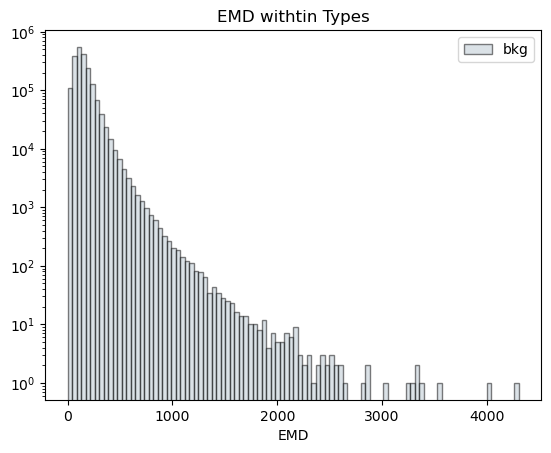

In [20]:
sig_color = load_toml_config("sig_color")
plt.hist(bkg_emds, bins=100, edgecolor='black', color=sig_color['SM'], alpha=0.5, label='bkg')
plt.yscale('log')
plt.legend()
plt.title("EMD withtin Types")
plt.xlabel("EMD")
plt.show()